## **Dataset used:** Pokemon Image Dataset
https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

In [ ]:
import pandas as pd
import zipfile

# Unzipping the provided dataset
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('pokemon_dataset')

# Loading the CSV file to understand its structure
pokemon_df = pd.read_csv('pokemon_dataset/pokemon.csv')
pokemon_df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


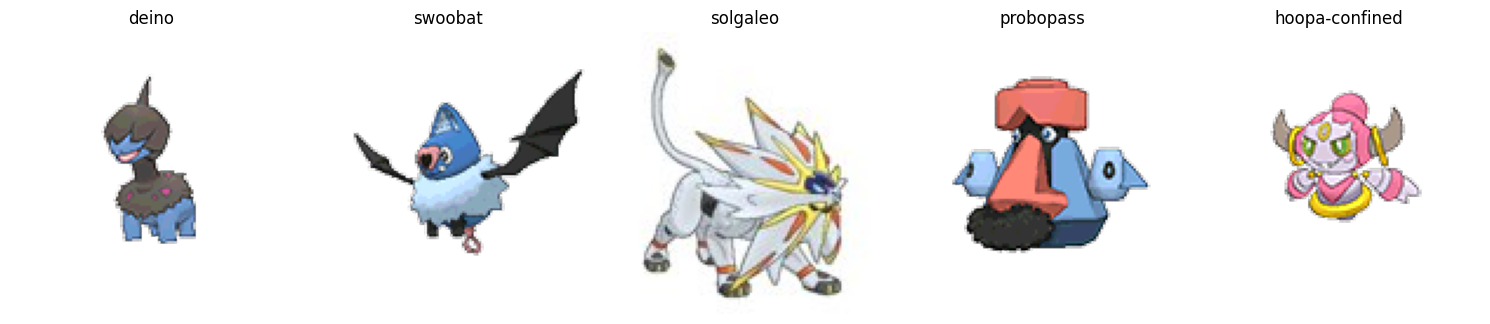

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Setting the path for images
image_path = 'pokemon_dataset/images/images/'

# Getting a list of all image filenames
image_files = os.listdir(image_path)

# Loading and displaying the first 5 Pokémon images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_file in enumerate(image_files[:5]):
    img = Image.open(os.path.join(image_path, img_file))
    axes[i].imshow(img)
    axes[i].set_title(img_file.split('.')[0])  # Setting title as the Pokémon name
    axes[i].axis('off')

plt.tight_layout()
plt.show()

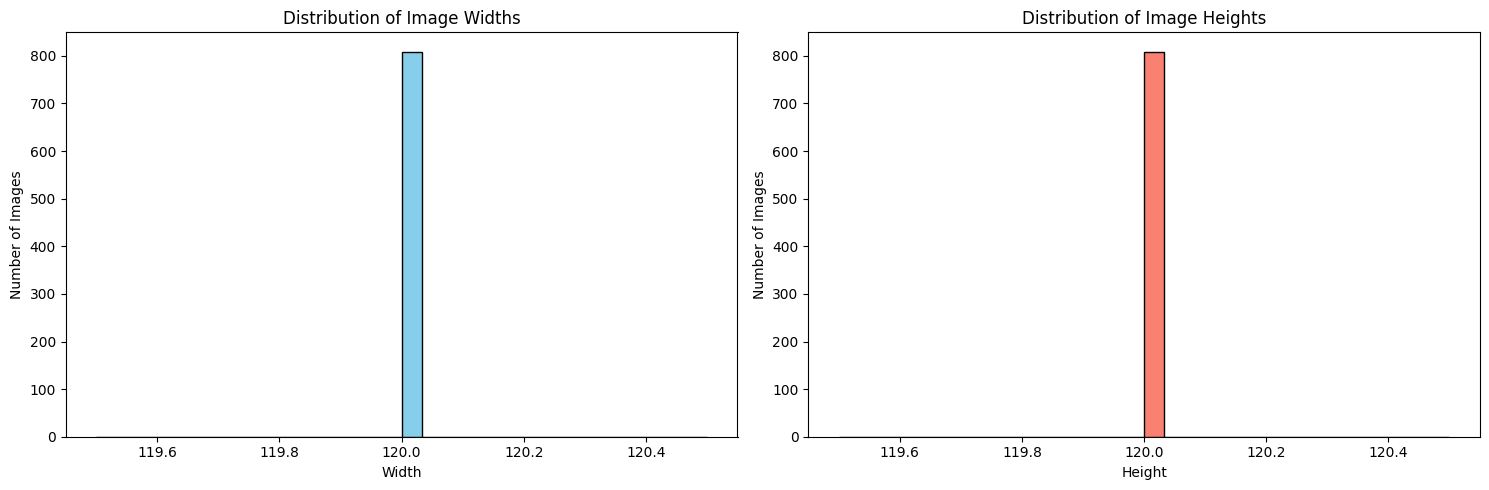

In [ ]:
# Extracting dimensions (width and height) of all images
image_dimensions = [Image.open(os.path.join(image_path, img_file)).size for img_file in image_files]

# Separating widths and heights
widths, heights = zip(*image_dimensions)

# Plotting distribution of widths and heights
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting widths
ax[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Number of Images')

# Plotting heights
ax[1].hist(heights, bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


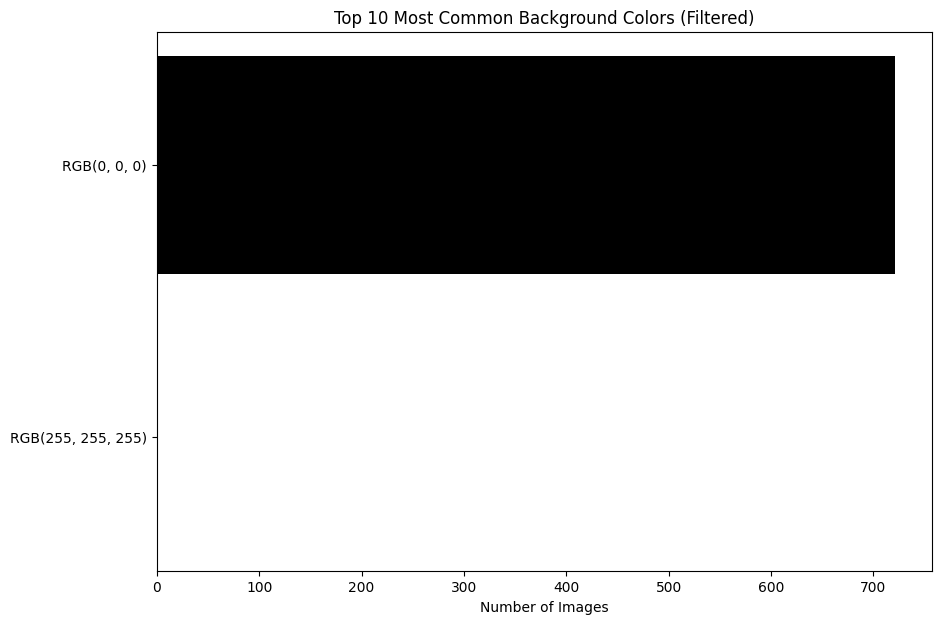

In [ ]:
from collections import Counter

# Extracting background colors of images with RGB check
filtered_background_colors = []

for img_file in image_files:
    img = Image.open(os.path.join(image_path, img_file))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    filtered_background_colors.append(img.getpixel((0, 0)))

# Counting occurrences of each filtered background color
filtered_color_counts = Counter(filtered_background_colors)

# Extracting top 10 most common filtered background colors
top_filtered_colors = filtered_color_counts.most_common(10)
filtered_colors, filtered_counts = zip(*top_filtered_colors)

# Plotting distribution of top filtered background colors
plt.figure(figsize=(10, 7))
plt.barh(range(len(filtered_colors)), filtered_counts, color=[(r/255, g/255, b/255) for r, g, b in filtered_colors])
plt.yticks(range(len(filtered_colors)), [f"RGB({r}, {g}, {b})" for r, g, b in filtered_colors])
plt.xlabel("Number of Images")
plt.title("Top 10 Most Common Background Colors (Filtered)")
plt.gca().invert_yaxis()  # Inverting y-axis for better visualization
plt.show()

In [ ]:
# Checking for missing values in the CSV data
missing_values = pokemon_df.isnull().sum()

missing_values


Name       0
Type1      0
Type2    404
dtype: int64

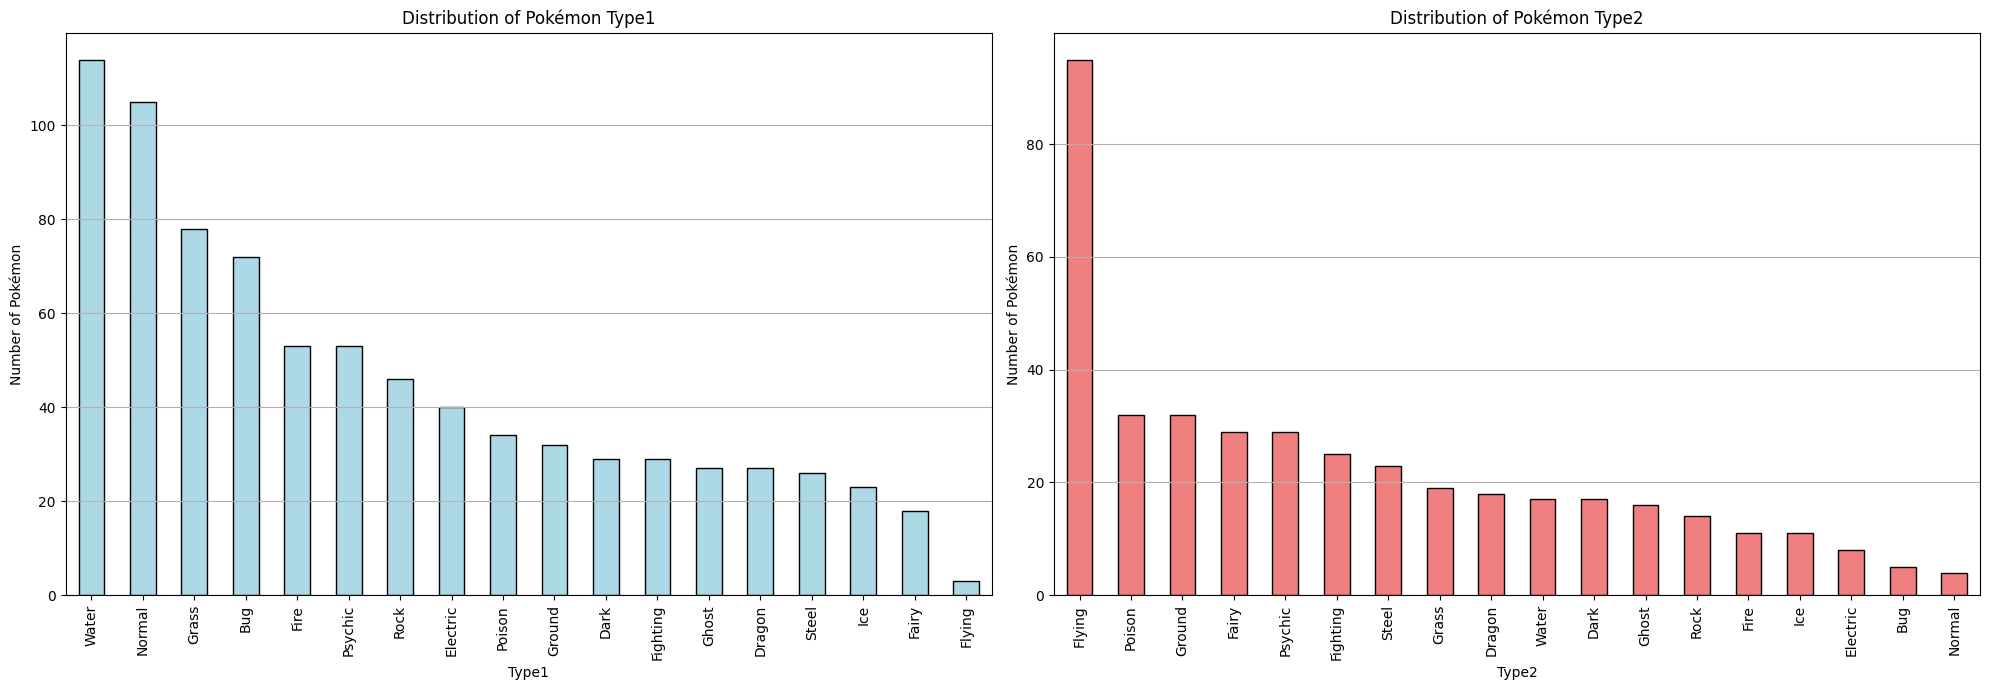

In [ ]:
# Exploring the distribution of Pokémon types (Type1 and Type2)
type1_counts = pokemon_df['Type1'].value_counts()
type2_counts = pokemon_df['Type2'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plotting distribution of Type1
type1_counts.plot(kind='bar', ax=ax[0], color='lightblue', edgecolor='black')
ax[0].set_title('Distribution of Pokémon Type1')
ax[0].set_xlabel('Type1')
ax[0].set_ylabel('Number of Pokémon')
ax[0].grid(axis='y')

# Plotting distribution of Type2
type2_counts.plot(kind='bar', ax=ax[1], color='lightcoral', edgecolor='black')
ax[1].set_title('Distribution of Pokémon Type2')
ax[1].set_xlabel('Type2')
ax[1].set_ylabel('Number of Pokémon')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


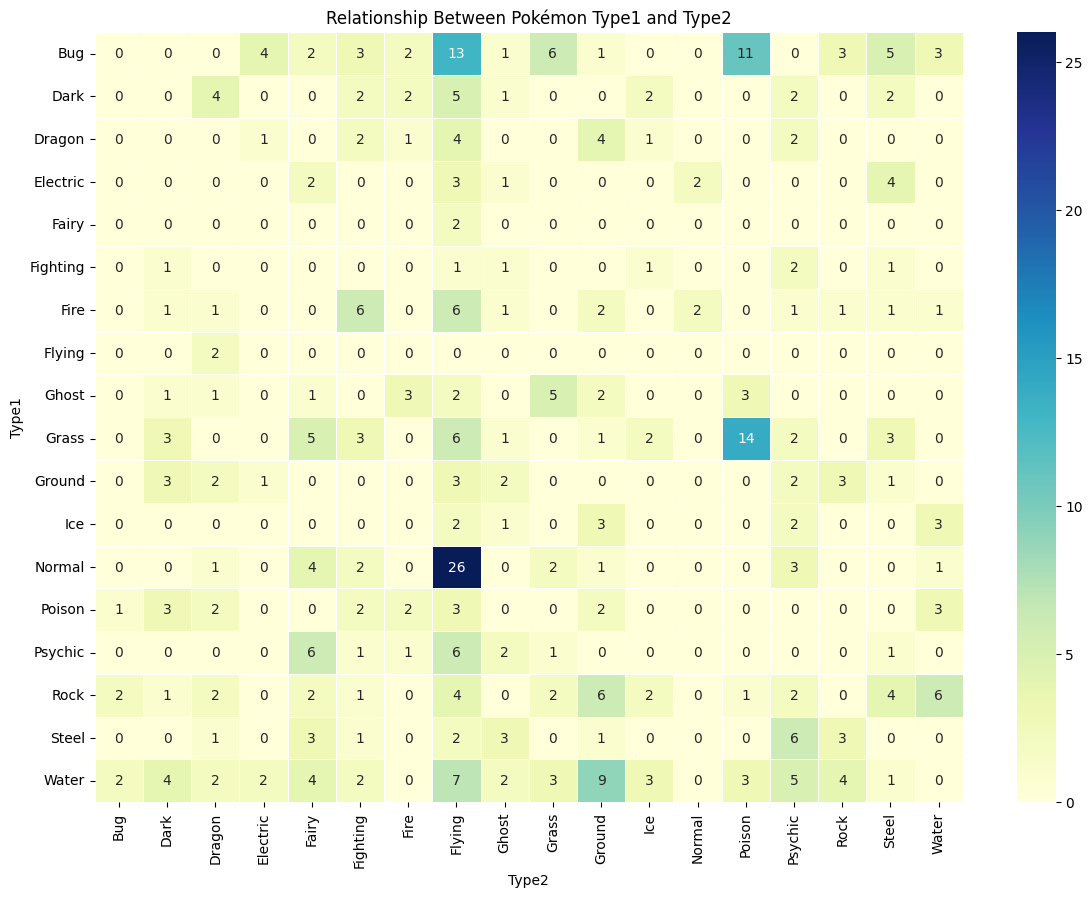

In [ ]:
import seaborn as sns

# Creating a heatmap to visualize the relationship between Type1 and Type2
type_combinations = pokemon_df.groupby(['Type1', 'Type2']).size().unstack().fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(type_combinations, annot=True, cmap="YlGnBu", linewidths=.5, fmt='.0f')
plt.title('Relationship Between Pokémon Type1 and Type2')
plt.show()


In [ ]:
# Extracting Pokémon names from image filenames
image_names = [img_file.split('.')[0] for img_file in image_files]

# Checking if every Pokémon name in the CSV has a corresponding image
missing_images = set(pokemon_df['Name']) - set(image_names)

# Checking if every image in the dataset corresponds to a Pokémon name in the CSV
extra_images = set(image_names) - set(pokemon_df['Name'])

missing_images, extra_images

(set(), set())

In [ ]:
# Checking for duplicate entries in the CSV data
duplicates = pokemon_df[pokemon_df.duplicated()]

duplicates


,Name,Type1,Type2


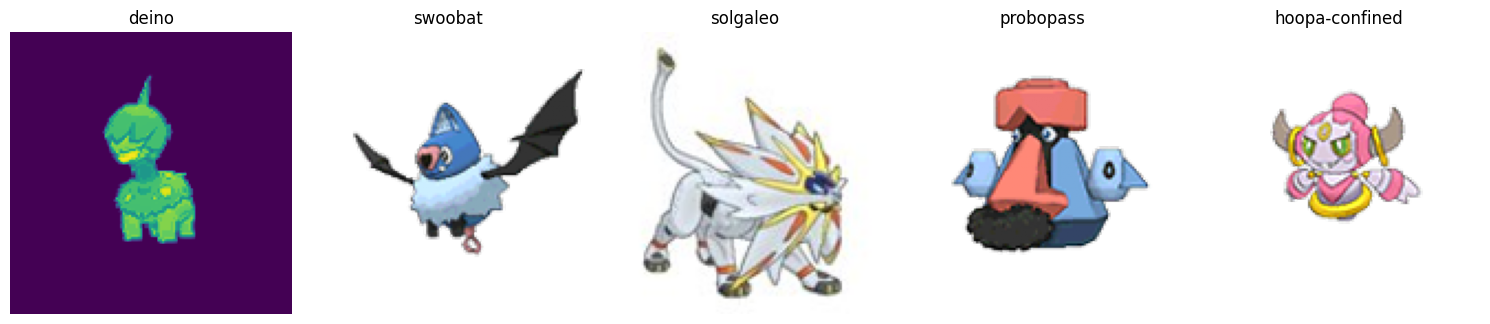

In [ ]:
import numpy as np

def preprocess_image(img_path, target_size=(128, 128)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalizing to [0, 1]
    return img_array

# Preprocessing the first 5 Pokémon images again
preprocessed_images = [preprocess_image(os.path.join(image_path, img_file)) for img_file in image_files[:5]]

# Displaying the preprocessed images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_array in enumerate(preprocessed_images):
    axes[i].imshow(img_array)
    axes[i].set_title(image_files[i].split('.')[0])  # Setting title as the Pokémon name
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation, and test sets
train_df, temp_df = train_test_split(pokemon_df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df.shape, valid_df.shape, test_df.shape

((566, 3), (121, 3), (122, 3))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Type1' and 'Type2' columns
label_encoders = {}

for column in ['Type1', 'Type2']:
    le = LabelEncoder()
    pokemon_df[column] = pokemon_df[column].fillna('None')  # Handling NaN values
    pokemon_df[column] = le.fit_transform(pokemon_df[column])
    label_encoders[column] = le

# Displaying the first few rows after encoding
pokemon_df.head()

,Name,Type1,Type2
0,bulbasaur,9,14
1,ivysaur,9,14
2,venusaur,9,14
3,charmander,6,12
4,charmeleon,6,12


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Defining a simple neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Input shape based on our preprocessed images
    Dense(128, activation='relu'),
    Dense(len(label_encoders['Type1'].classes_), activation='softmax')  # Number of classes in Type1
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 18)                2322      
                                                                 
Total params: 6293906 (24.01 MB)
Trainable params: 6293906 (24.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
from PIL import Image

import os

def load_and_preprocess_images(df, image_path, target_size=(128, 128)):
    images = []
    for img_name in df['Name']:
        # Check for the file extension
        if os.path.exists(os.path.join(image_path, f"{img_name}.jpg")):
            img = Image.open(os.path.join(image_path, f"{img_name}.jpg"))
        elif os.path.exists(os.path.join(image_path, f"{img_name}.png")):
            img = Image.open(os.path.join(image_path, f"{img_name}.png"))
        else:
            raise FileNotFoundError(f"No image found for {img_name} in {image_path}")

        # Convert image to RGB (3 channels)
        img = img.convert('RGB')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

# Load images for training, validation, and test sets
train_images = load_and_preprocess_images(train_df, image_path)
valid_images = load_and_preprocess_images(valid_df, image_path)
test_images = load_and_preprocess_images(test_df, image_path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Extract labels for training, validation, and test sets
train_labels = train_df['Type1'].values
valid_labels = valid_df['Type1'].values
test_labels = test_df['Type1'].values

train_images = train_images.astype('float32')
valid_images = valid_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:
# Re-encode the 'Type1' column
label_encoder = LabelEncoder()
pokemon_df['Type1'] = label_encoder.fit_transform(pokemon_df['Type1'])

# Update the split dataframes
train_df['Type1'] = pokemon_df.loc[train_df.index, 'Type1']
valid_df['Type1'] = pokemon_df.loc[valid_df.index, 'Type1']
test_df['Type1'] = pokemon_df.loc[test_df.index, 'Type1']

# Extract the labels again
train_labels = train_df['Type1'].values
valid_labels = valid_df['Type1'].values
test_labels = test_df['Type1'].values

train_images.dtype, train_labels.dtype, valid_images.dtype, valid_labels.dtype

In [ ]:
# Ensure that the 'Type1' column is encoded as integers
label_encoder = LabelEncoder()
pokemon_df['Type1'] = label_encoder.fit_transform(pokemon_df['Type1'])

# Extract labels for training, validation, and test sets again
train_labels = train_df['Type1'].values
valid_labels = valid_df['Type1'].values
test_labels = test_df['Type1'].values

# Training the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
18/18 [==============================] - 2s 105ms/step - loss: 9.6065 - accuracy: 0.0936 - val_loss: 5.7873 - val_accuracy: 0.1074
Epoch 2/10
18/18 [==============================] - 2s 88ms/step - loss: 4.8768 - accuracy: 0.1502 - val_loss: 4.8075 - val_accuracy: 0.0992
Epoch 3/10
18/18 [==============================] - 2s 87ms/step - loss: 4.1767 - accuracy: 0.1502 - val_loss: 3.6954 - val_accuracy: 0.0826
Epoch 4/10
18/18 [==============================] - 2s 90ms/step - loss: 2.7138 - accuracy: 0.2014 - val_loss: 2.9019 - val_accuracy: 0.1074
Epoch 5/10
18/18 [==============================] - 2s 87ms/step - loss: 2.4733 - accuracy: 0.2403 - val_loss: 2.8715 - val_accuracy: 0.1322
Epoch 6/10
18/18 [==============================] - 2s 103ms/step - loss: 2.2598 - accuracy: 0.3110 - val_loss: 2.8037 - val_accuracy: 0.1322
Epoch 7/10
18/18 [==============================] - 2s 121ms/step - loss: 2.1517 - accuracy: 0.3375 - val_loss: 2.9111 - val_accuracy: 0.1570
Epoch 8/10

In [ ]:
# Evaluating the model on validation data
validation_loss, validation_accuracy = model.evaluate(valid_images, valid_labels)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

4/4 [==============================] - 0s 14ms/step - loss: 2.9180 - accuracy: 0.1488
Validation Accuracy: 14.88%


In [ ]:
from keras.models import load_model

model.save("pokemon_model.keras")
loaded_model = load_model('pokemon_model.keras')  # Load the model when needed
loaded_model